# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [1]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [164]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)


NameError: name 'i' is not defined

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [165]:
def svd_validation(A):
    u, s, vh = svd(A)
    m, n = A.shape
    B = np.zeros((m,n))
    for i in range(min(m,n)):
        B += (s[i] * u[:,i:(i+1)] * vh[i])
    return np.allclose(A, B)


In [166]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

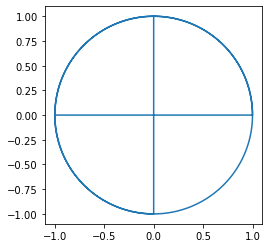

In [35]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [36]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


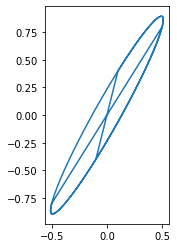

In [37]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [38]:
u, s, vh = svd(A)

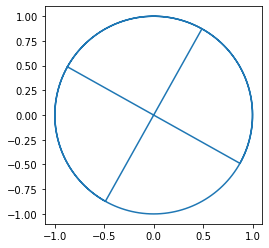

In [41]:
show_circle(u @ circle)

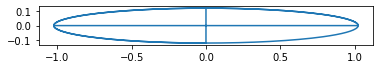

In [62]:
show_circle(np.diag(s) @ circle)

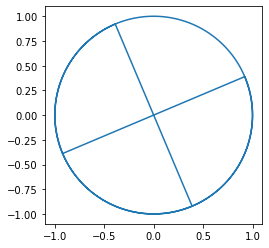

In [58]:
show_circle(vh @ circle)

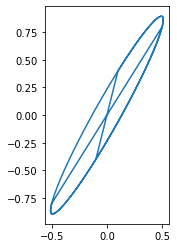

In [64]:
show_circle((u @ np.diag(s) @ vh) @ circle)

__Respuesta:__ $U$ rota la circunferencia, $\Sigma$ la "estira" en el eje x y por último $V^H$ rota lo mismo que $U$ pero en sentido contrario.

__Respuesta:__ Al aplicar los 3 operadores ($U$, $\Sigma$ y $V^H$) se realiza la misma transformación que al aplicar el operador lineal $A$.

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [134]:
from pathlib import Path
from PIL import Image

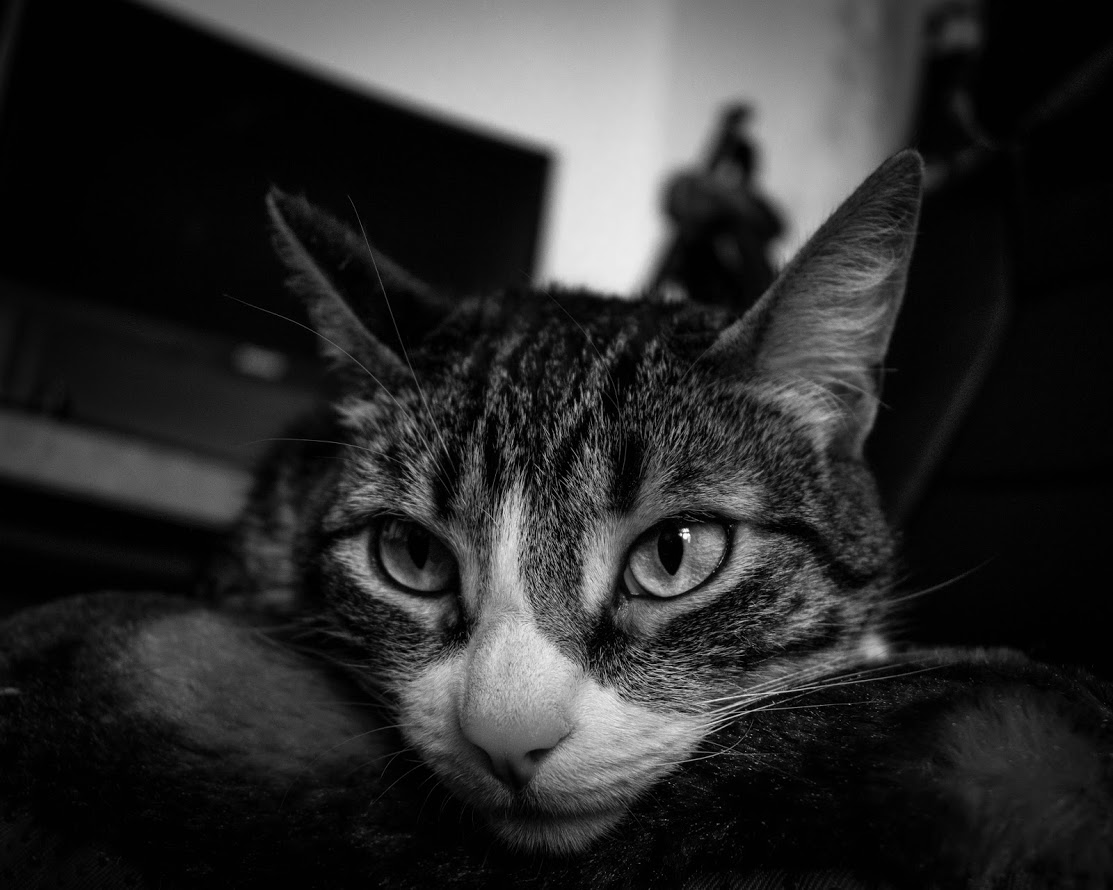

In [136]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [137]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [253]:
def low_rank_svd_approximation(A, l):
    u, s, vh = svd(A)
    m, n = A.shape
    Al = np.zeros((m,n))
    error_numerador = 0
    for i in range(l):
        Al += (s[i] * u[:,i:(i+1)] * vh[i])
    for i in range(m):
        for j in range(n):
            error_numerador += (A[i,j] - Al[i,j]) ** 2
    norma = np.linalg.norm(A)  # el error lo tomé como la diferencia de la norma de (A - Al)dividida por la norma de A
    print ('El error es:')
    print (np.sqrt(error_numerador)/norma)
    return Al

El error es:
0.2211745453998465


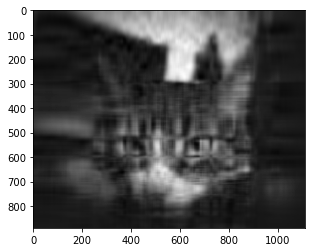

In [254]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

El error es:
0.1122597255059531


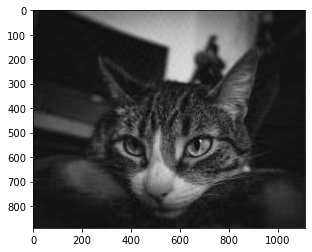

In [286]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [282]:
def low_rank_svd_tol_approximation(A, tol):
    u, s, vh = svd(A)
    m, n = A.shape
    rango = 2
    error = 1
    while error >= tol:
        Ale = np.zeros((m,n))
        rango += 1
        error_numerador = 0
        for i in range(rango):
            Ale += (s[i] * u[:,i:(i+1)] * vh[i])
        error = np.linalg.norm(A-Ale)/np.linalg.norm(A)  # me di cuenta que no era necesario el par de ciclos for
        # no entendí bien lo del error con los valores propios, por lo que lo hice
        # como el ejercicio anterior

    print ('El rango mínimo que cumple con la tolerancia es:')
    print (rango)
    return Ale

    

El rango mínimo que cumple con la tolerancia es:
64


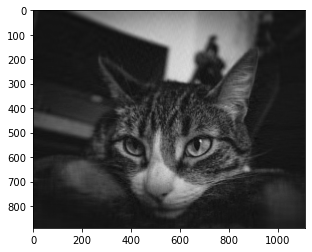

In [283]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

El rango mínimo que cumple con la tolerancia es:
457


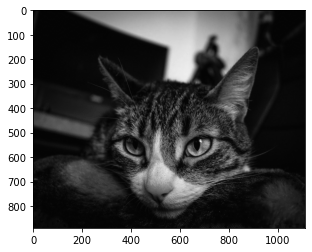

In [289]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

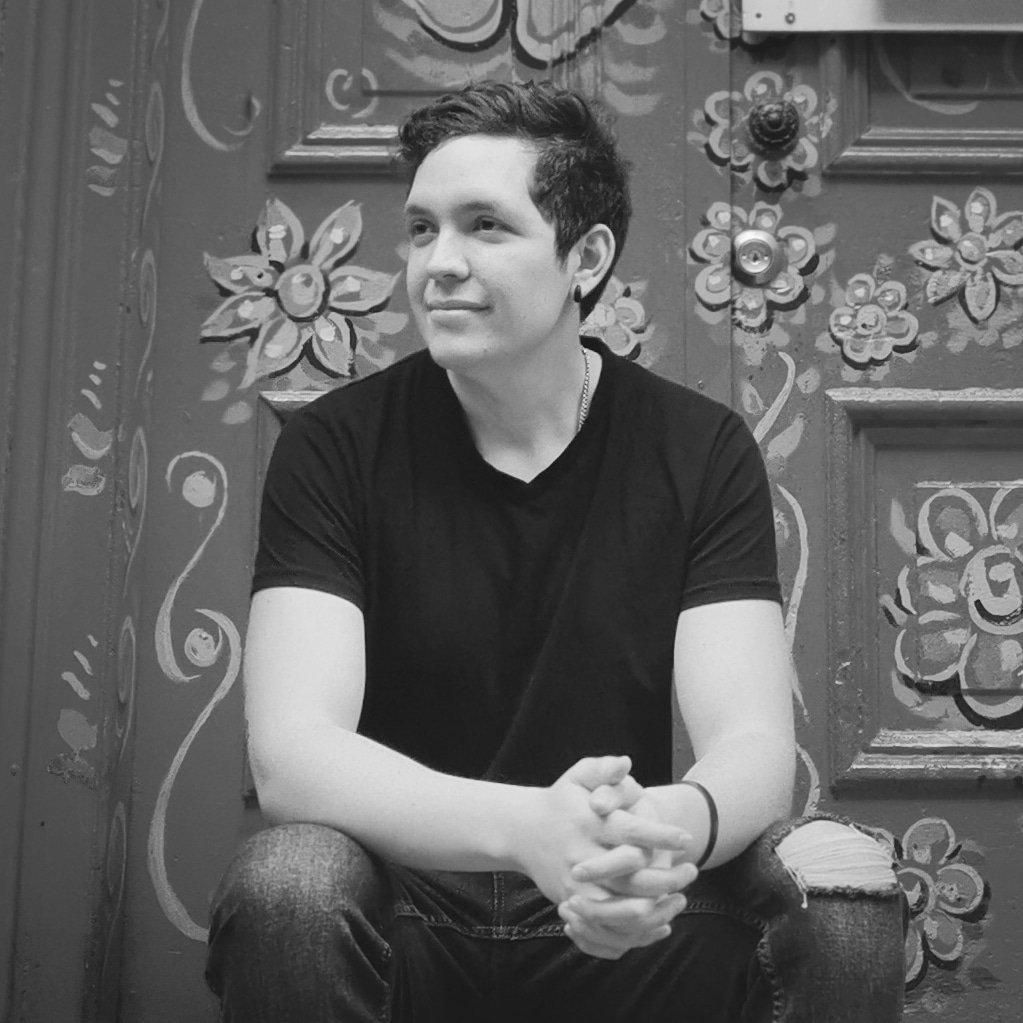

In [248]:
your_img_name = "YoLukas.jpeg"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img

In [250]:
your_img_np = np.array(your_img)
your_img_np.shape

(1023, 1023)

El error es:
0.16588923769474567


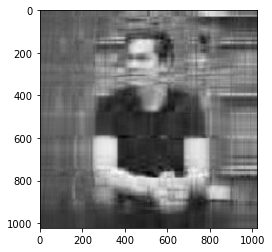

In [251]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

El error es:
0.1273734689193752


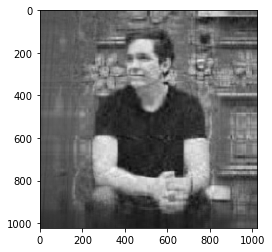

In [252]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

El rango mínimo que cumple con la tolerancia es:
34


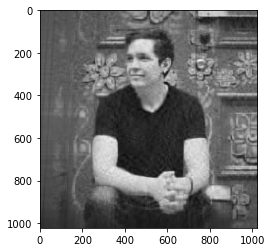

In [287]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

El rango mínimo que cumple con la tolerancia es:
343


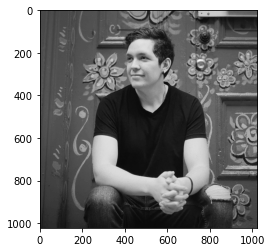

In [288]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ Creo que es una manera útil, pero deben existir formas más eficientes. Debo admitir que me impresiona lo "fácil" que es comprimir una imagen de esta forma, pensé que era un proceso mucho más complejo.

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [290]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [322]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-10-02,2020-10-05,2020-10-09,2020-10-12,2020-10-16,2020-10-19,2020-10-24,2020-10-26,2020-10-30,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,8597.0,8772.0,8996.0,9138.0,9343.0,9472.0,9679.0,9763.0,9888.0,3994.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,27.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,2270.9
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,67.0,70.0,70.0,70.0,70.0,70.0,71.0,72.0,72.0,2862.8
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,36.0,36.0,40.0,43.0,43.0,43.0,44.0,36.0,NaN


In [366]:
start_date = '2020-10-01'
end_date = '2020-10-11'

In [399]:
covid_tasa_promedio_nuevos = (
    covid_comunas.dropna(subset=['codigo_comuna']) # no considerar registros con código de comuna nulos
    .fillna(0) # cambiar todos los datos NaN por 0, considerando que ya se eliminaron las filas necesarias en la línea anterior
    .melt(id_vars=['region','codigo_region','comuna','codigo_comuna','poblacion','tasa'], var_name='fecha', value_name='casos_totales')
    .sort_values(['comuna','fecha']) # valores ordenados por comuna y fecha 
    .assign(casos_nuevos=lambda x: x['casos_totales'] - x['casos_totales'].shift(1)) # diferencia entre casos totales    
)
covid_tasa_promedio_nuevos['fecha'] = pd.to_datetime(covid_tasa_promedio_nuevos['fecha']) # no supe incorporar esto antes
covid_tasa_promedio_nuevos = (
    covid_tasa_promedio_nuevos.query("'2020-10-01' <= fecha <= '2020-10-11'") # no me sirvió con start_date
    .groupby(["region", "comuna"]).agg(promedio_casos_nuevos=("casos_nuevos", "mean")).astype(int) # lo pasé a int porque se ve más lindo
    .merge(covid_comunas[['region','comuna','poblacion']], how='left', on=['region','comuna'])
    .assign(tasa_promedio_casos_nuevos=lambda x: x['promedio_casos_nuevos'] * 100000 / x['poblacion']) 
    # intenté ponerle astype(int) pero no pude
    .sort_values(['tasa_promedio_casos_nuevos'], ascending=False)
)

covid_tasa_promedio_nuevos.head(20)

,region,comuna,promedio_casos_nuevos,poblacion,tasa_promedio_casos_nuevos
163,Magallanes,Timaukel,3,282.0,1063.829787
162,Magallanes,San Gregorio,4,681.0,587.371512
158,Magallanes,Porvenir,34,7323.0,464.290591
160,Magallanes,Punta Arenas,631,141984.0,444.416272
157,Magallanes,Natales,96,23782.0,403.666639
156,Magallanes,Laguna Blanca,1,264.0,378.787879
140,Los Lagos,San Juan de la Costa,20,7639.0,261.814374
139,Los Lagos,Rio Negro,32,14275.0,224.168126
10,Araucanía,Carahue,46,25486.0,180.491250
16,Araucanía,Ercilla,15,8458.0,177.346891


In [397]:
covid_tasa_promedio_nuevos

,region,comuna,promedio_casos_nuevos,poblacion,tasa_promedio_casos_nuevos
163,Magallanes,Timaukel,3,282.0,1063.829787
162,Magallanes,San Gregorio,4,681.0,587.371512
158,Magallanes,Porvenir,34,7323.0,464.290591
160,Magallanes,Punta Arenas,631,141984.0,444.416272
157,Magallanes,Natales,96,23782.0,403.666639
...,...,...,...,...,...
102,Coquimbo,La Higuera,0,4450.0,0.000000
89,Biobío,San Rosendo,0,3611.0,0.000000
307,Valparaíso,Panquehue,0,7633.0,0.000000
86,Biobío,Quilaco,0,4179.0,0.000000


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Están todas en Magallanes, otra cosa que llama la atención es que  después de Magallanes vienen regiones que se encuentran en el sur.

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [521]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,738,737,832,542,343,706,777,1058,1025,868
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,932,1046,1044,796,714,694,946,1752,906,1263
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,1890,2239,3825,1749,1354,1858,1238,1906,2549,3544
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,838,1020,939,563,340,237,838,863,781,920
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1128,1057,1026,473,1503,1050,1125,1351,1245,1438


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [461]:
covid_pcr_melt = (
    covid_pcr
    .drop(columns=['codigo_region','poblacion']) # borro columnas que no voy a usar
    .melt(id_vars=['region'], var_name='fecha', value_name='nm_pcr')
    .fillna(0)
)
covid_pcr_melt['fecha'] = pd.to_datetime(covid_pcr_melt['fecha']) # de nuevo no supe cómo incorporarlo antes


covid_pcr_melt

,region,fecha,nm_pcr
0,Arica y Parinacota,2020-04-09,70.0
1,Tarapacá,2020-04-09,0.0
2,Antofagasta,2020-04-09,182.0
3,Atacama,2020-04-09,57.0
4,Coquimbo,2020-04-09,0.0
...,...,...,...
3307,Araucanía,2020-11-01,1878.0
3308,Los Ríos,2020-11-01,836.0
3309,Los Lagos,2020-11-01,5232.0
3310,Aysén,2020-11-01,333.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [475]:
covid_casos_melt = (
    covid_comunas
    .drop(columns=['codigo_region','codigo_comuna','poblacion','tasa','comuna']) # borro columnas que no voy a usar
    .melt(id_vars=['region'], var_name='fecha', value_name='casos_totales')
    .fillna(0)
)
covid_casos_melt['fecha'] = pd.to_datetime(covid_casos_melt['fecha']) # de nuevo no supe cómo incorporarlo antes
covid_casos_melt = (
    covid_casos_melt
    .groupby(["region","fecha"], as_index=False).agg(casos_totales=("casos_totales","sum"))
)
covid_casos_melt

,region,fecha,casos_totales
0,Antofagasta,2020-03-30,29.0
1,Antofagasta,2020-04-01,32.0
2,Antofagasta,2020-04-03,49.0
3,Antofagasta,2020-04-06,65.0
4,Antofagasta,2020-04-08,72.0
...,...,...,...
1019,Ñuble,2020-10-16,9129.0
1020,Ñuble,2020-10-19,9270.0
1021,Ñuble,2020-10-24,9534.0
1022,Ñuble,2020-10-26,9634.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [516]:
covid_corr_casos_pcr = (
    covid_casos_melt.merge(covid_pcr_melt, how='outer', on=['region','fecha'])
    .fillna(0) # mismo que ffill??
    .groupby("region").corr() # en un principio sumé los datos, donde también vi cierta correlación
    # finalmente opté por usar corr ya que daría una respuesta más "literal"
    # intenté usar apply para poder ordenar los datos pero no supe cómo meter corr en el apply :(
)

covid_corr_casos_pcr



casos_totales    nm_pcr
region                                                   
Antofagasta        casos_totales       1.000000  0.283722
                   nm_pcr              0.283722  1.000000
Araucanía          casos_totales       1.000000  0.333724
                   nm_pcr              0.333724  1.000000
Arica y Parinacota casos_totales       1.000000  0.428292
                   nm_pcr              0.428292  1.000000
Atacama            casos_totales       1.000000  0.412564
                   nm_pcr              0.412564  1.000000
Aysén              casos_totales       1.000000  0.361063
                   nm_pcr              0.361063  1.000000
Biobío             casos_totales       1.000000  0.426168
                   nm_pcr              0.426168  1.000000
Coquimbo           casos_totales       1.000000  0.406176
                   nm_pcr              0.406176  1.000000
Los Lagos          casos_totales       1.000000  0.324397
                   nm_pcr              0.324397  1.000000
Los Ríos           casos_totales       1.000000  0.399651
                   nm_pcr              0.399651  1.000000
Magallanes         casos_totales       1.000000  0.387628
                   nm_pcr              0.387628  1.000000
Maule              casos_totales       1.000000  0.405878
                   nm_pcr              0.405878  1.000000
Metropolitana      casos_totales       1.000000  0.325000
                   nm_pcr              0.325000  1.000000
O’Higgins          casos_totales       1.000000  0.400194
                   nm_pcr              0.400194  1.000000
Tarapacá           casos_totales       1.000000  0.360963
                   nm_pcr              0.360963  1.000000
Valparaíso         casos_totales       1.000000  0.367980
                   nm_pcr              0.367980  1.000000
Ñuble              casos_totales       1.000000  0.396698
                   nm_pcr              0.396698  1.000000

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ Claramente existe una relación entre el número de casos y de exámenes realizados (es de 0.4 aprox. de forma constante), sí se condice con lo que yo esperaba (mayor cantidad de tests mayor cantidad de detectados). 

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

¿Hay una correlación entre los pacientes en UCI por región y los casos confirmados por región?

In [520]:
covid_uci = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_uci

,region,codigo_region,poblacion,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,...,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02
0,Arica y Parinacota,15,252110,0,0,0,0,2,4,4,...,14,14,16,16,16,14,13,13,14,14
1,Tarapacá,1,382773,1,1,1,1,1,2,2,...,9,10,10,10,10,9,9,9,8,8
2,Antofagasta,2,691854,3,4,3,3,3,3,2,...,24,30,30,29,29,27,24,23,22,21
3,Atacama,3,314709,0,0,0,0,0,0,0,...,6,6,10,9,9,8,7,7,7,6
4,Coquimbo,4,836096,1,1,1,2,1,1,2,...,16,14,15,15,15,13,12,12,11,12
5,Valparaíso,5,1960170,14,17,18,22,27,22,21,...,64,64,65,65,64,62,61,63,61,61
6,Metropolitana,13,8125072,83,90,107,129,146,161,160,...,352,343,349,356,357,360,367,362,355,341
7,O’Higgins,6,991063,5,5,5,5,5,6,6,...,45,43,42,43,44,44,49,47,48,45
8,Maule,7,1131939,3,3,3,3,4,5,7,...,25,26,25,24,24,26,28,28,26,23
9,Ñuble,16,511551,7,8,10,11,10,11,13,...,14,14,15,14,14,12,12,12,13,13


In [528]:
covid_uci_melt = (
    covid_uci
    .drop(columns=['codigo_region','poblacion']) # borro columnas que no voy a usar
    .melt(id_vars=['region'], var_name='fecha', value_name='casos_totales')
    .fillna(0)
)
covid_uci_melt['fecha'] = pd.to_datetime(covid_uci_melt['fecha']) # de nuevo no supe cómo incorporarlo antes
covid_uci_melt = (
    covid_uci_melt
    .groupby(["region"], as_index=False).agg(casos_totales_uci=("casos_totales","sum"))
)

covid_uci_melt

,region,casos_totales_uci
0,Antofagasta,10583
1,Araucanía,4268
2,Arica y Parinacota,3036
3,Atacama,1172
4,Aysén,241
5,Biobío,13268
6,Coquimbo,5042
7,Los Lagos,4446
8,Los Ríos,829
9,Magallanes,2184


In [529]:
covid_casos_melt = (
    covid_comunas
    .drop(columns=['codigo_region','codigo_comuna','poblacion','tasa','comuna']) # borro columnas que no voy a usar
    .melt(id_vars=['region'], var_name='fecha', value_name='casos_totales')
    .fillna(0)
)
covid_casos_melt['fecha'] = pd.to_datetime(covid_casos_melt['fecha']) # de nuevo no supe cómo incorporarlo antes
covid_casos_melt = (
    covid_casos_melt
    .groupby(["region"], as_index=False).agg(casos_totales=("casos_totales","sum"))
)
covid_casos_melt

,region,casos_totales
0,Antofagasta,685040.0
1,Araucanía,260833.0
2,Arica y Parinacota,247337.0
3,Atacama,183654.0
4,Aysén,10760.0
5,Biobío,753215.0
6,Coquimbo,380514.0
7,Los Lagos,277245.0
8,Los Ríos,62569.0
9,Magallanes,213112.0


In [538]:
covid_corr_casos_uci = (
    covid_casos_melt.merge(covid_uci_melt, how='outer', on=['region'])
    .fillna(0) # mismo que ffill??
    .groupby("region").apply(lambda x: x['casos_totales_uci'] / x['casos_totales']) 
    # no supe cómo ponerle nombre a la columna del apply
)

covid_corr_casos_uci

region                
Antofagasta         0     0.015449
Araucanía           1     0.016363
Arica y Parinacota  2     0.012275
Atacama             3     0.006382
Aysén               4     0.022398
Biobío              5     0.017615
Coquimbo            6     0.013250
Los Lagos           7     0.016036
Los Ríos            8     0.013249
Magallanes          9     0.010248
Maule               10    0.014269
Metropolitana       11    0.012498
O’Higgins           12    0.015233
Tarapacá            13    0.008854
Valparaíso          14    0.014849
Ñuble               15    0.010338
dtype: float64

__Respuesta:__ Elegí estos datos para ver si en la región metropolitana habían más personas en UCI según los contagiados (lo cual era lo que esperaba por la centralización del país), sin embargo, los resultados arrojan que existe cierto "balance" entre las regiones (excepto en el norte, donde los casos UCI son muy pocos).

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

Comparar, por grupo de edad, el promedio de los pacientes en UCI con la cantidad total de fallecidos. ¿Cuál es el grupo más vulnerable en base a esto?

In [540]:
covid_pacientes_edad = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto9/HospitalizadosUCIEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pacientes_edad

,grupo_de_edad,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,...,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02
0,<=39,23,23,26,40,40,38,39,42,46,...,49,44,46,48,49,50,47,42,41,40
1,40-49,23,27,34,36,40,40,38,39,48,...,46,49,51,54,57,63,66,65,66,57
2,50-59,53,67,74,84,89,95,101,109,102,...,154,153,155,151,155,154,160,163,157,156
3,60-69,39,46,56,68,75,78,82,93,89,...,233,234,237,242,241,240,249,242,242,239
4,>=70,35,37,47,52,63,76,77,79,75,...,247,243,241,245,243,241,242,244,237,231


In [568]:
covid_pacientes_edad_melt = (
    covid_pacientes_edad
    .melt(id_vars=['grupo_de_edad'], var_name='fecha', value_name='casos_totales')
    .fillna(0)

)
covid_pacientes_edad_melt['fecha'] = pd.to_datetime(covid_pacientes_edad_melt['fecha']) # de nuevo no supe cómo incorporarlo antes
covid_pacientes_edad_melt = (
    covid_pacientes_edad_melt.groupby('grupo_de_edad').agg(casos_promedio_UCI=("casos_totales","mean"))
)
covid_pacientes_edad_melt
    

,casos_promedio_UCI
grupo_de_edad,
40-49,108.310185
50-59,267.370370
60-69,362.819444
<=39,86.509259
>=70,268.106481


In [555]:
covid_muertos_edad = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_muertos_edad

,grupo_de_edad,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,...,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02
0,<=39,2,2,3,3,3,3,3,3,4,...,310,311,311,313,313,314,315,317,317,319
1,40-49,1,2,2,2,2,2,2,2,2,...,469,469,472,473,473,477,480,483,484,486
2,50-59,1,2,2,3,3,5,5,6,8,...,1404,1409,1414,1415,1415,1423,1425,1431,1436,1440
3,60-69,9,10,12,12,12,12,12,14,16,...,2943,2957,2966,2971,2973,2994,3005,3013,3023,3032
4,70-79,21,22,24,28,29,30,31,32,36,...,3906,3915,3934,3942,3943,3973,3981,3996,4010,4022
5,80-89,19,21,24,25,26,32,33,38,40,...,3572,3591,3608,3613,3615,3634,3646,3659,3664,3685
6,>=90,4,6,6,7,7,8,8,10,10,...,1288,1292,1298,1299,1300,1303,1306,1308,1313,1318


In [569]:
covid_muertos_edad_melt = (
    covid_muertos_edad[['grupo_de_edad','2020-11-02']].rename(columns={'2020-11-02' : 'total_fallecidos'})

)

covid_muertos_edad_melt
    

,grupo_de_edad,total_fallecidos
0,<=39,319
1,40-49,486
2,50-59,1440
3,60-69,3032
4,70-79,4022
5,80-89,3685
6,>=90,1318


In [573]:
covid_merge_casos_muertos = (
    covid_muertos_edad_melt.merge(covid_pacientes_edad_melt, how='outer', on=['grupo_de_edad'])
)
covid_merge_casos_muertos

,grupo_de_edad,total_fallecidos,casos_promedio_UCI
0,<=39,319.0,86.509259
1,40-49,486.0,108.310185
2,50-59,1440.0,267.370370
3,60-69,3032.0,362.819444
4,70-79,4022.0,NaN
5,80-89,3685.0,NaN
6,>=90,1318.0,NaN
7,>=70,NaN,268.106481


__Respuesta:__ Aparentemente el grupo más afectado es el de 60-69 años, me faltó combinar los datos de grupo de edad en una sola categoría (>=70)